#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html
* https://seaborn.pydata.org/examples/errorband_lineplots.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [206]:
import torch as th
import torch.nn as nn

In [207]:
fc = nn.Linear(in_features=5, out_features=3)

In [208]:
fc.weight

Parameter containing:
tensor([[-0.2777,  0.1097, -0.1456, -0.0588, -0.0644],
        [ 0.1750,  0.1677, -0.0415,  0.2088,  0.1831],
        [ 0.2745,  0.3176, -0.0477, -0.3461,  0.3424]], requires_grad=True)

In [209]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

In [210]:
fc.weight

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [211]:
model = nn.Sequential(
    # ...
    nn.Dropout(p=0.5)
)

In [212]:
X = th.randn(1, 5)
X

tensor([[-1.2656, -0.1772, -0.5923,  0.3335, -0.8922]])

In [213]:
model(X) # scale: 1/(1-p)

tensor([[-0.0000, -0.3544, -0.0000,  0.6671, -1.7844]])

In [214]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [215]:
model(X)

tensor([[-1.2656, -0.1772, -0.5923,  0.3335, -0.8922]])

In [216]:
model.train()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [217]:
X = th.randn(100, 5)
X

tensor([[-0.8152, -2.8657, -0.0737, -0.0822, -0.7161],
        [ 0.6735, -2.2755, -0.8763, -0.6064, -1.3334],
        [-1.0860, -0.4144, -1.3270, -1.5493,  0.2102],
        [ 0.2557,  0.7503, -0.6506, -0.6039, -0.0174],
        [ 1.5806,  1.4618,  0.1440,  0.3322,  0.7661],
        [-0.6634,  0.4125, -0.1078, -1.7651,  0.0098],
        [-0.2705,  0.0349,  1.2973,  0.4847, -0.3052],
        [ 0.7156,  0.5300, -0.1789, -0.9368, -0.9251],
        [ 1.7753,  1.4760, -0.4173,  1.9513,  1.7887],
        [-2.9152,  0.3187, -0.6694, -2.3146,  0.4095],
        [ 0.1150, -1.2329,  0.7862,  0.2413, -1.2113],
        [ 0.4159,  1.2935, -0.7855, -1.3989,  0.8929],
        [ 1.1396, -0.3960, -0.1747, -0.2783,  0.0073],
        [-0.2209,  0.0405,  1.1835,  1.0127,  0.8333],
        [ 0.3772, -0.8503,  0.4157,  0.9101, -1.0586],
        [ 0.6888,  0.0580,  0.6426, -1.7934, -0.0717],
        [-0.2743, -1.2671, -1.1963,  0.0594, -0.9812],
        [ 0.3488,  0.0957, -0.3869,  0.1384,  0.8041],
        [ 

In [218]:
X.mean(dim=0), X.std(dim=0), X.var(dim=0)

(tensor([-0.0155,  0.0093, -0.1577, -0.0455,  0.0204]),
 tensor([1.0448, 1.0189, 0.9794, 1.0214, 0.9997]),
 tensor([1.0915, 1.0381, 0.9593, 1.0432, 0.9995]))

In [219]:
bn = nn.BatchNorm1d(num_features=5)
y = bn(X)

In [220]:
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([ 0.0000e+00,  2.0266e-08, -4.4703e-09,  2.1458e-08, -1.9073e-08],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

In [221]:
bn.weight, bn.bias

(Parameter containing:
 tensor([1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0.], requires_grad=True))

In [222]:
bn.running_mean

tensor([-0.0016,  0.0009, -0.0158, -0.0045,  0.0020])

In [223]:
bn.running_var

tensor([1.0092, 1.0038, 0.9959, 1.0043, 0.9999])

In [224]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [225]:
y = bn(X)
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([ 0.0000e+00,  2.0266e-08, -4.4703e-09,  2.1458e-08, -1.9073e-08],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

## Задачи для самостоятельного решения

<p class='task' id='1'></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={'a': 0.0, 'b': 1.0})
```

- [x] Проверено на семинаре

In [226]:
import torch as th
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import torchmetrics as M
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [227]:
class InitializedLinear(nn.Linear):
    def __init__(self, n_features, n_hidden, bias=True, init_f=nn.init.uniform_, init_args=None):
        super(InitializedLinear, self).__init__(n_features, n_hidden, bias)
        
        if init_args is None:
            init_args = {}
        
        init_f(self.weight, **init_args)

layer = InitializedLinear(10, 5, init_f=nn.init.uniform_, init_args={'a': 0.0, 'b': 1.0})
layer.weight

Parameter containing:
tensor([[0.5111, 0.3520, 0.2593, 0.3654, 0.6003, 0.7224, 0.0122, 0.7949, 0.2352,
         0.6836],
        [0.6376, 0.3267, 0.5712, 0.8630, 0.1779, 0.2490, 0.6295, 0.3586, 0.9768,
         0.2265],
        [0.8320, 0.1359, 0.8225, 0.3185, 0.3502, 0.0274, 0.4382, 0.1812, 0.1211,
         0.2701],
        [0.2480, 0.2952, 0.3624, 0.3565, 0.6253, 0.9678, 0.3320, 0.8150, 0.5635,
         0.7038],
        [0.2988, 0.5462, 0.5620, 0.5011, 0.6415, 0.9793, 0.3036, 0.1266, 0.3526,
         0.6755]], requires_grad=True)

In [228]:
layer = InitializedLinear(10, 5, init_f=nn.init.xavier_uniform_)
layer.weight

Parameter containing:
tensor([[ 0.2798,  0.1179, -0.5776, -0.2467, -0.0416,  0.1231, -0.5679, -0.5221,
          0.5987, -0.2991],
        [ 0.0221, -0.3559, -0.4192,  0.3691,  0.2764, -0.2624, -0.6105,  0.5600,
          0.6216,  0.0472],
        [ 0.5242,  0.1779, -0.2483, -0.1902,  0.1282,  0.2395, -0.3535, -0.5893,
          0.2148, -0.2630],
        [-0.0846, -0.0065, -0.1456, -0.0827, -0.5060, -0.4083, -0.3645,  0.2002,
          0.3143, -0.5404],
        [ 0.2958,  0.3312,  0.6101,  0.5028,  0.0309,  0.5319,  0.1475, -0.3554,
          0.0083,  0.0235]], requires_grad=True)

<p class='task' id='2'></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`
* `nn.xavier_normal_`
* `nn.kaiming_normal_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Обратите внимание, что от запуска к запуску результаты могут отличаться. Чтобы решить эту проблему, обучайте каждую модель несколько раз и визуализируйте доверительный интервал (можно воспользоваться `seaborn.lineplot`).

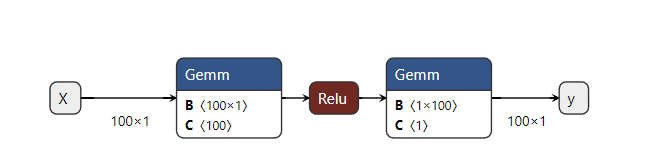

- [ ] Проверено на семинаре

In [229]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


In [230]:
X = th.linspace(0, 1, 100).view(-1, 1).to(device)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size()).to(device)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [231]:
initialization_functions = [(nn.init.uniform_, {'a': 0.0, 'b': 1.0}, 'uniform_'),
               (nn.init.normal_, {'mean': 0.0, 'std': 1.0}, 'normal_'),
               (nn.init.constant_, {'val': 1.0}, 'constant_'),
               (nn.init.xavier_uniform_, {'gain': 1.0}, 'xavier_uniform_'),
               (nn.init.kaiming_uniform_, {'a': 0.0, 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}, 'kaiming_uniform_'),
               (nn.init.xavier_normal_, {'gain': 1.0}, 'xavier_normal_'),
               (nn.init.kaiming_normal_, {'a': 0.0, 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}, 'kaiming_normal_')]

models = [
    nn.Sequential(
    InitializedLinear(n_features=1, n_hidden=100, init_f=init[0], init_args=init[1]),
    nn.ReLU(),
    InitializedLinear(n_features=100, n_hidden=1, init_f=init[0], init_args=init[1])
).to(device)
    for init in initialization_functions]

criterion = nn.MSELoss().to(device)
optimizer = optim.AdamW(models[0].parameters(), lr=0.005)

In [232]:
def train_model(model, criterion, optimizer, train_loader, n_epochs=1000):
    epoch_losses = []
    loss_metric = M.MeanMetric().to(device)
    
    for epoch in range(n_epochs+1):
        loss_metric.reset()  
        
        for X_batch, y_batch in train_loader:
            model.train()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss_metric.update(loss)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss = loss_metric.compute().item()
        epoch_losses.append(epoch_loss)

    return epoch_losses

In [233]:
results = []
for initialization in initialization_functions:

    for run in range(5):
        model = nn.Sequential(
                    InitializedLinear(n_features=1, n_hidden=100, init_f=initialization[0], init_args=initialization[1]),
                    nn.Tanh(),
                    InitializedLinear(n_features=100, n_hidden=1, init_f=initialization[0], init_args=initialization[1])
                ).to(device)
        criterion = nn.MSELoss().to(device)
        optimizer = optim.AdamW(model[0].parameters(), lr=0.005)
        epoch_losses = train_model(model, criterion, optimizer, loader, n_epochs=100)
        for epoch, loss in enumerate(epoch_losses):
                    results.append({
                        'Initialization': str(initialization[2]),
                        'Epoch': epoch,
                        'Loss': loss,
                        'Run': run
                    })

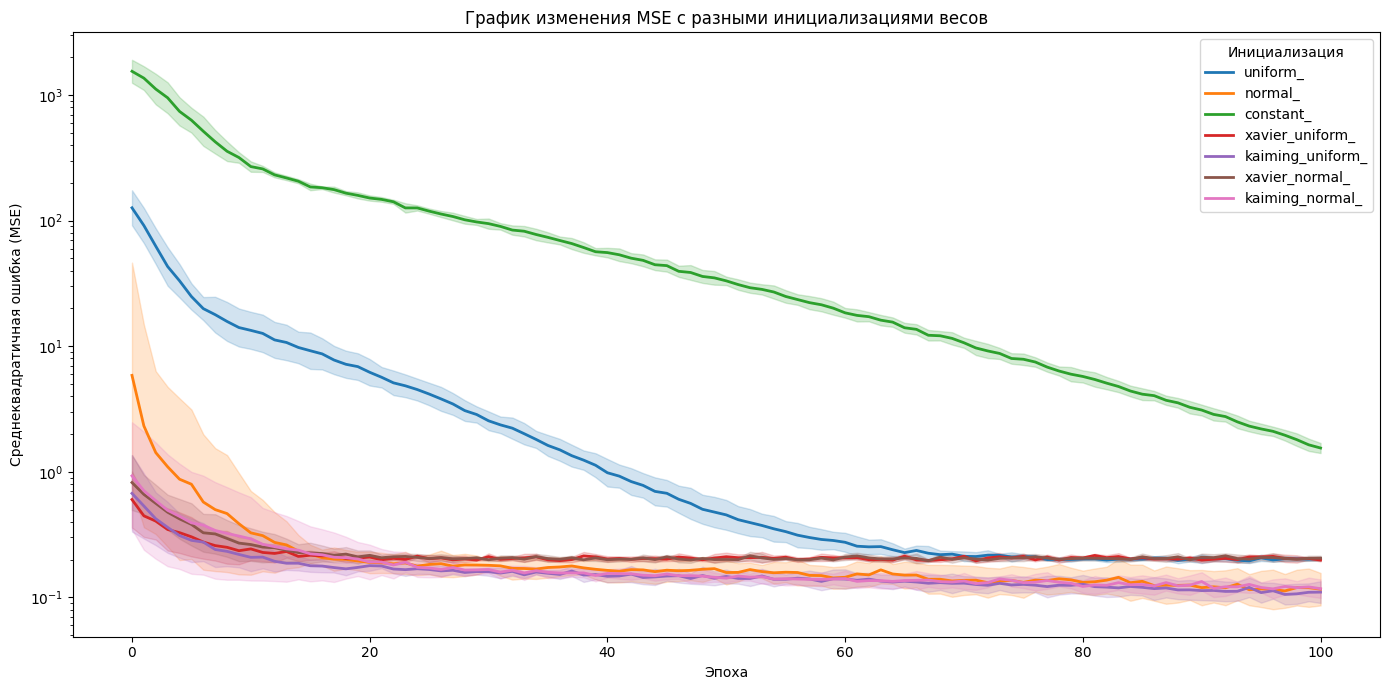

In [234]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(14, 7))
ax = plt.gca()
ax.set_yscale('log')
sns.lineplot(
    data=results_df,
    x='Epoch',
    y='Loss',
    hue='Initialization',
    errorbar='sd',
    linewidth=2
)

plt.title('График изменения MSE с разными инициализациями весов')
plt.xlabel('Эпоха')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.legend(title='Инициализация')
plt.tight_layout()
plt.show()

<p class='task' id='3'></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

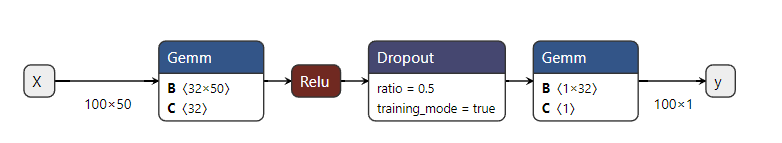

- [ ] Проверено на семинаре

In [235]:
def train_model_with_metrics(model, criterion, optimizer, train_loader, n_epochs=1000, print_every=100):
    epoch_losses = []
    r2_scores = []

    loss_metric = M.MeanMetric().to(device)
    r2_metric = M.R2Score().to(device)
    
    for epoch in range(n_epochs + 1):
        loss_metric.reset()
        r2_metric.reset()

        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            loss_metric.update(loss)
            r2_metric.update(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss = loss_metric.compute().item()
        r2_score = r2_metric.compute().item()
        epoch_losses.append(epoch_loss)
        r2_scores.append(r2_score)

        if epoch % print_every == 0:
            print(f'Epoch [{epoch}/{n_epochs}], Loss: {epoch_loss:.4f}, R²: {r2_score:.4f}')

    return epoch_losses, r2_scores

def model_eval(model, test_loader):
    model.eval()
    y_pred_list, y_test_list = [], []
    with th.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            y_pred_list.append(y_pred)
            y_test_list.append(y_batch)

    y_pred_test = th.cat(y_pred_list)
    y_test = th.cat(y_test_list)
    
    r2 = M.R2Score().to(device)(y_pred_test, y_test).item()
    return r2


In [236]:
from sklearn.datasets import make_regression
import torch as th
from torch.utils.data import random_split

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X).to(device)
y = th.FloatTensor(y).reshape(-1, 1).to(device)
dataset = TensorDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [237]:
models = [
    nn.Sequential(
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        nn.Dropout(p),
        nn.Linear(32, 1)
    ).to(device)
    for p in np.arange(0, 0.9, 0.1)]

In [238]:
r2_train = []
r2_test = []
for model in models:
    criterion = nn.MSELoss().to(device)
    optimizer = optim.AdamW(model.parameters(), lr=0.005)

    epoch_losses, r2_scores = train_model_with_metrics(
            model, 
            criterion, 
            optimizer, 
            train_loader,
            n_epochs=1000,
            print_every=500
        )
    r2_train.append(r2_scores[-1])
    r2_test.append(model_eval(model, test_loader))
r2_test

Epoch [0/1000], Loss: 65764.4297, R²: -0.0020
Epoch [500/1000], Loss: 0.2486, R²: 1.0000
Epoch [1000/1000], Loss: 0.0154, R²: 1.0000
Epoch [0/1000], Loss: 65784.3281, R²: -0.0023
Epoch [500/1000], Loss: 632.6265, R²: 0.9904
Epoch [1000/1000], Loss: 451.9332, R²: 0.9931
Epoch [0/1000], Loss: 65775.8281, R²: -0.0022
Epoch [500/1000], Loss: 1089.4662, R²: 0.9834
Epoch [1000/1000], Loss: 1408.2474, R²: 0.9785
Epoch [0/1000], Loss: 65756.4609, R²: -0.0019
Epoch [500/1000], Loss: 3266.0542, R²: 0.9502
Epoch [1000/1000], Loss: 2104.2310, R²: 0.9679
Epoch [0/1000], Loss: 65773.7891, R²: -0.0022
Epoch [500/1000], Loss: 2927.2485, R²: 0.9554
Epoch [1000/1000], Loss: 3004.3569, R²: 0.9542
Epoch [0/1000], Loss: 65762.3750, R²: -0.0020
Epoch [500/1000], Loss: 4970.7900, R²: 0.9243
Epoch [1000/1000], Loss: 3718.3894, R²: 0.9433
Epoch [0/1000], Loss: 65770.7656, R²: -0.0021
Epoch [500/1000], Loss: 7735.4443, R²: 0.8821
Epoch [1000/1000], Loss: 4688.0430, R²: 0.9286
Epoch [0/1000], Loss: 65734.4219, R

[0.8270248174667358,
 0.8503029346466064,
 0.8594214916229248,
 0.8590887784957886,
 0.8660664558410645,
 0.8421757221221924,
 0.8435999155044556,
 0.7960571050643921,
 0.7674756050109863]

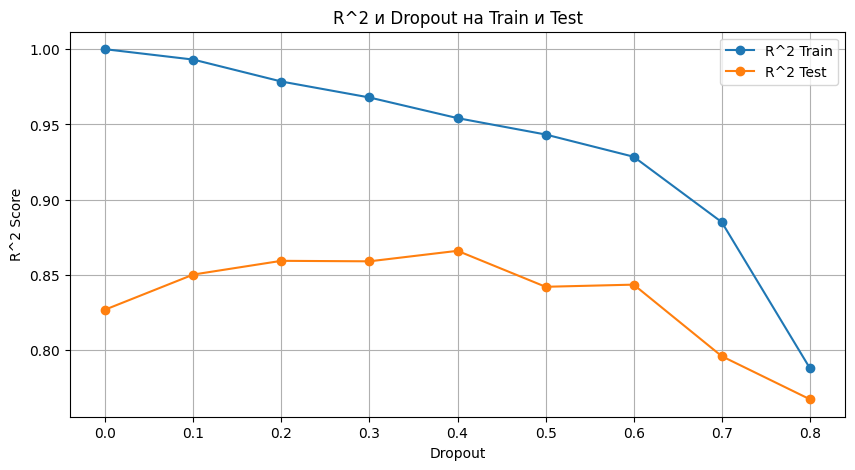

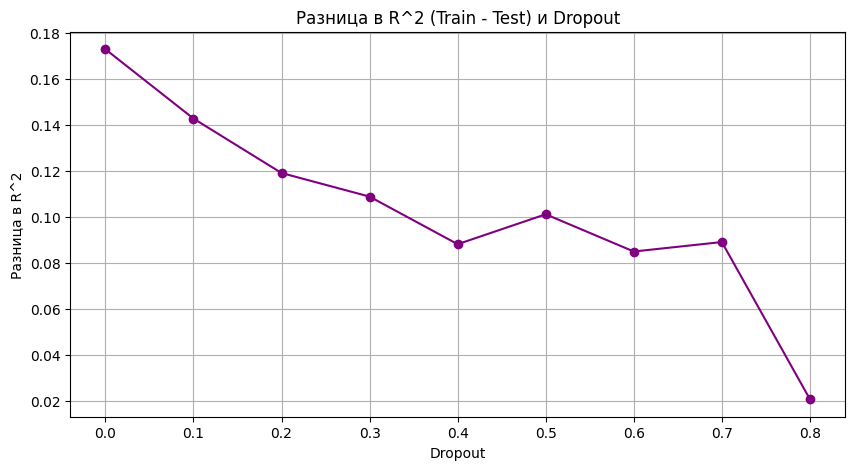

In [239]:
r2_difference = [train - test for train, test in zip(r2_train, r2_test)]

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 0.9, 0.1), r2_train, marker='o', label='R^2 Train')
plt.plot(np.arange(0, 0.9, 0.1), r2_test, marker='o', label='R^2 Test')
plt.xlabel('Dropout')
plt.ylabel('R^2 Score')
plt.title('R^2 и Dropout на Train и Test')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 0.9, 0.1), r2_difference, marker='o', color='purple')
plt.xlabel('Dropout')
plt.ylabel('Разница в R^2')
plt.title('Разница в R^2 (Train - Test) и Dropout')
plt.grid(True)
plt.show()

<p class='task' id='4'></p>

4\. Решите задачу регрессии с и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

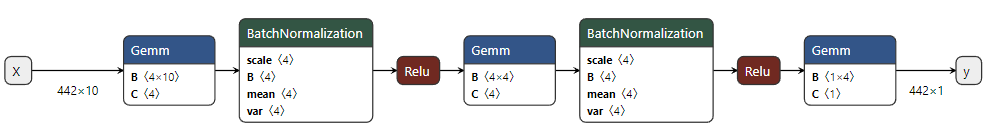

- [ ] Проверено на семинаре

In [240]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X).to(device)
y = th.FloatTensor(y).reshape(-1, 1).to(device)
y = (y - y.mean())/y.std()
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [241]:
def create_model(use_batch_norm=True):
    if use_batch_norm:
        return nn.Sequential(
            nn.Linear(X.shape[1], 4),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )
    else:
        return nn.Sequential(
            nn.Linear(X.shape[1], 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

In [242]:
r2_scores_all = []
for norm in [True, False]:
    for lr in [0.001, 0.01, 0.1]:
        model = create_model(use_batch_norm=norm).to(device)
        criterion = nn.MSELoss().to(device)
        optimizer = optim.AdamW(model.parameters(), lr=lr)

        epoch_losses, r2_scores = train_model_with_metrics(
                model, 
                criterion, 
                optimizer, 
                loader,
                n_epochs=250,
                print_every=250
            )
        r2_scores_all.append(r2_scores)

Epoch [0/250], Loss: 1.0842, R²: -0.0833
Epoch [250/250], Loss: 0.4912, R²: 0.5091
Epoch [0/250], Loss: 0.8018, R²: 0.1904
Epoch [250/250], Loss: 0.5270, R²: 0.4714
Epoch [0/250], Loss: 0.8226, R²: 0.1705
Epoch [250/250], Loss: 0.5786, R²: 0.4190
Epoch [0/250], Loss: 1.0041, R²: -0.0026
Epoch [250/250], Loss: 0.4755, R²: 0.5227
Epoch [0/250], Loss: 1.0932, R²: -0.1032
Epoch [250/250], Loss: 0.4349, R²: 0.5645
Epoch [0/250], Loss: 1.0590, R²: -0.0631
Epoch [250/250], Loss: 1.0065, R²: -0.0097


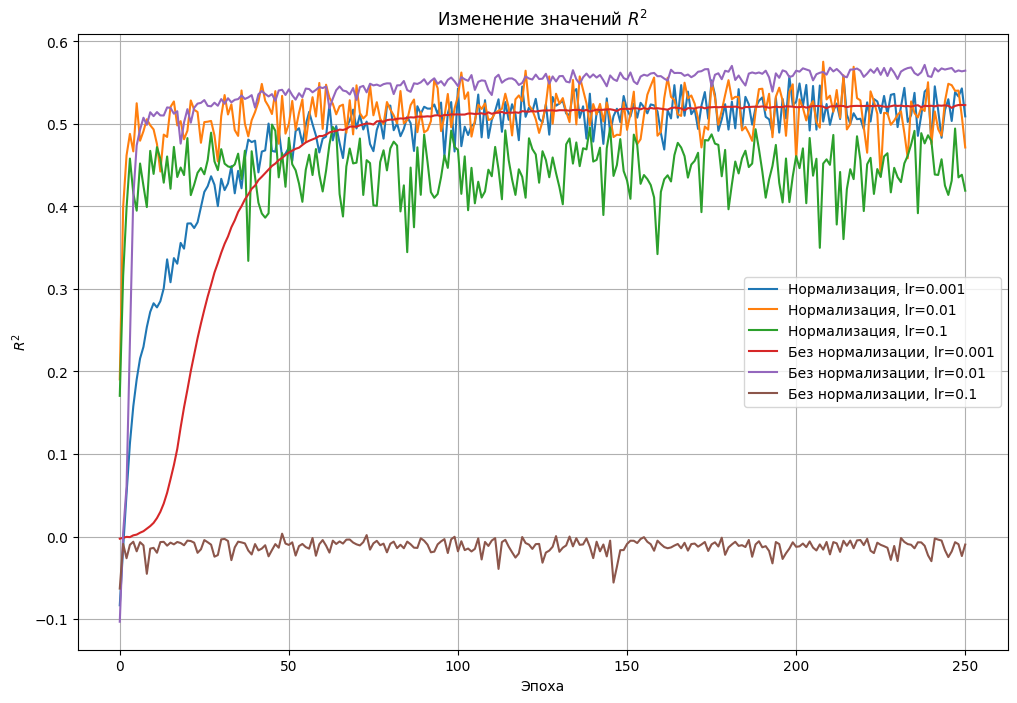

In [243]:
learning_rates = [0.001, 0.01, 0.1]
normalization_status = ["Нормализация", "Без нормализации"]
x = range(251)
plt.figure(figsize=(12, 8)) 
for i, y in enumerate(r2_scores_all):
    status = normalization_status[0] if i < 3 else normalization_status[1]
    lr = learning_rates[i % 3]
    plt.plot(x, y, label=f'{status}, lr={lr}')

plt.xlabel('Эпоха')
plt.ylabel('$R^2$')
plt.title('Изменение значений $R^2$')
plt.legend()  
plt.grid(True)

plt.show()

<p class='task' id='5'></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagrad, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [244]:
def train_model_with_metrics(model, criterion, optimizer, train_loader, n_epochs=1000, print_every=100):
    epoch_losses = []
    mape_scores = []

    loss_metric = M.MeanMetric().to(device)
    mape_metric = M.MeanAbsolutePercentageError().to(device)
    
    for epoch in range(n_epochs + 1):
        loss_metric.reset()  
        mape_metric.reset()
        
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            
            loss_metric.update(loss)
            mape_metric.update(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss = loss_metric.compute().item()
        epoch_losses.append(epoch_loss)
        
        mape_score = mape_metric.compute().item()
        mape_scores.append(mape_score)

        if epoch % print_every == 0:
            print(f'Epoch [{epoch}/{n_epochs}], Loss: {epoch_loss:.4f}, MAPE: {mape_score:.4f}')

    return epoch_losses, mape_scores

In [245]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = 'http://lib.stat.cmu.edu/datasets/boston'
    raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Danya\AppData\Local\Temp\ipykernel_19972\4212683168.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)


In [246]:
X, y = load_boston()
X = th.FloatTensor(X).to(device)
y = th.FloatTensor(y).reshape(-1, 1).to(device)
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [247]:
import torch.optim as optim  

mape_all = []

optimizers = [
    optim.Adam,
    optim.Adagrad,
    optim.RMSprop,
    optim.SGD
]

for opt in optimizers:
    model = nn.Sequential(
                nn.Linear(X.shape[1], 4),
                nn.BatchNorm1d(4),
                nn.ReLU(),
                nn.Linear(4, 4),
                nn.BatchNorm1d(4),
                nn.ReLU(),
                nn.Linear(4, 1)
            ).to(device)
    
    criterion = nn.MSELoss().to(device)
    optimizer = opt(model.parameters(), lr=0.005)

    epoch_losses, mape_scores = train_model_with_metrics(
                model, 
                criterion, 
                optimizer, 
                loader,
                n_epochs=250,
                print_every=250
            )
    mape_all.append(mape_scores)

Epoch [0/250], Loss: 608.2167, MAPE: 1.0144
Epoch [250/250], Loss: 16.3703, MAPE: 0.1451
Epoch [0/250], Loss: 580.6119, MAPE: 0.9903
Epoch [250/250], Loss: 361.9750, MAPE: 0.7854
Epoch [0/250], Loss: 544.1707, MAPE: 0.9563
Epoch [250/250], Loss: 18.0747, MAPE: 0.1578
Epoch [0/250], Loss: 239.9512, MAPE: 0.5256
Epoch [250/250], Loss: 28.2474, MAPE: 0.1785


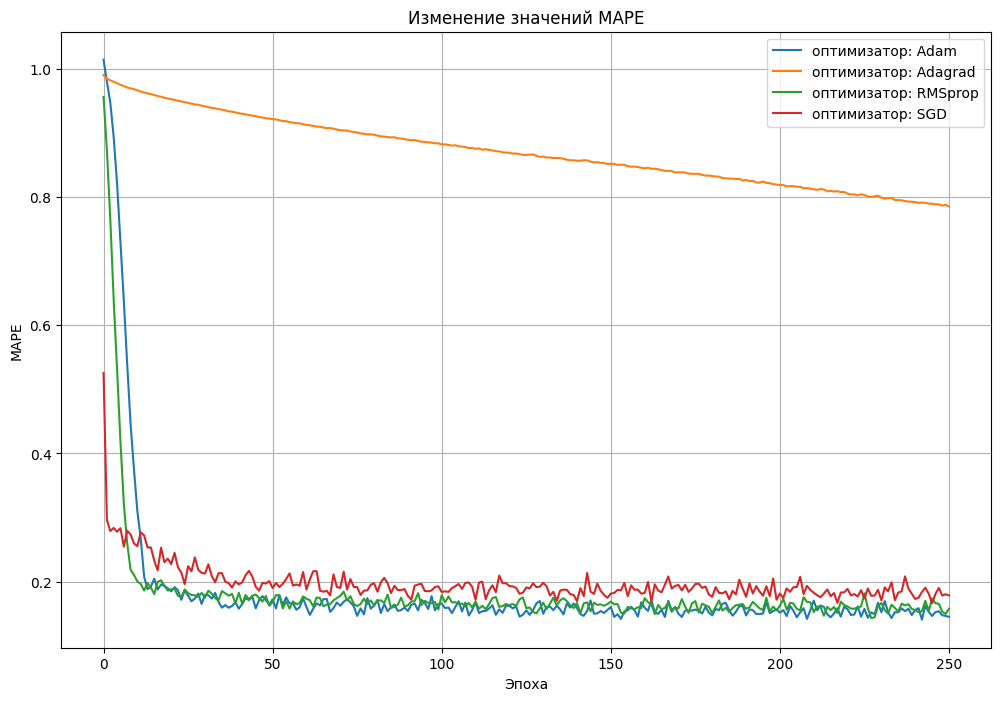

In [248]:
x = range(251)
plt.figure(figsize=(12, 8)) 
for i, y in enumerate(mape_all):
    opt = optimizers[i]
    plt.plot(x, y[:251], label=f'оптимизатор: {opt.__name__}')

plt.xlabel('Эпоха')
plt.ylabel('MAPE')
plt.title('Изменение значений MAPE')
plt.legend()  
plt.grid(True)

plt.show()